In [5]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime
import time

data = [json.loads(line) for line in open('21_aug_device1_1.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('21_aug_device76.csv')


<ipython-input-5-365601e7a196>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data)


In [6]:
data = [json.loads(line) for line in open('21_aug_device61.json', 'r')]
df2 = json_normalize(data)
t= []
epoch_time = df2['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df2 = df2.drop(columns = {'receivedTimestamp', 'key'})
df2.insert(0, 'Date Time',time_formatted)
df2.tail()
df2.to_csv('21_aug_device61.csv')


<ipython-input-6-9229fffd7de0>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data)


In [7]:
aero = pd.read_csv('aeroqual210821.csv')
df1 = pd.read_csv('21_aug_device76.csv')
df2 = pd.read_csv('21_aug_device61.csv')

In [8]:
print(aero.dtypes)
print(df1.dtypes)
print(df2.dtypes)

Date Time        object
 Monitor ID       int64
 Location ID      int64
 NO2(ppm)       float64
dtype: object
Unnamed: 0                  int64
Date Time                  object
data.temp_c               float64
data.hum_prcnt            float64
data.press_hpa            float64
data.eq_db                float64
data.onesmin_db           float64
data.onesmax_db           float64
data.co_ppm                 int64
data.no2_ppb                int64
data.co_mv                  int64
data.no2_mv                 int64
data.x_g                  float64
data.y_g                  float64
data.z_g                  float64
data.x_raw                  int64
data.y_raw                  int64
data.z_raw                  int64
data.lux_lx               float64
data.uv_mwpm2             float64
data.nc0p5_npcm3          float64
data.nc1p0_npcm3          float64
data.nc2p5_npcm3          float64
data.nc4p0_npcm3          float64
data.nc10p0_npcm3         float64
data.mc1p0_ugpm3          float64
data.m

In [10]:
print(aero.head())
print(df1.head())
print(df2.head())

           Date Time   Monitor ID   Location ID   NO2(ppm)
0  19 Aug 2021 11:21            1             1      0.011
1  19 Aug 2021 11:22            1             1      0.006
2  19 Aug 2021 11:23            1             1      0.010
3  19 Aug 2021 11:24            1             1      0.012
4  19 Aug 2021 11:25            1             1      0.014
   Unnamed: 0            Date Time  data.temp_c  data.hum_prcnt  \
0           0  2021-07-19 15:00:43    30.540001       55.152000   
1           1  2021-07-19 15:00:12    30.730000       54.738998   
2           2  2021-07-19 15:01:14    30.430000       55.417000   
3           3  2021-07-19 15:03:49    30.330000       55.816002   
4           4  2021-07-19 15:04:20    30.290001       56.027000   

   data.press_hpa  data.eq_db  data.onesmin_db  data.onesmax_db  data.co_ppm  \
0      935.490479   41.802673        39.707294        53.231300          464   
1      935.488708   40.899525        39.114651        43.748398          461   
2  

In [20]:
aero['Date Time'] = pd.to_datetime(aero['Date Time'], dayfirst = True)
df1['Date Time'] = pd.to_datetime(df1['Date Time'], yearfirst = True)
df1.set_index("Date Time", inplace = True)
DF1 = df1.resample('T').mean().round(3)
df2['Date Time'] = pd.to_datetime(df2['Date Time'], yearfirst = True)
df2.set_index("Date Time", inplace = True)
DF2 = df2.resample('T').mean().round(3)

In [33]:
D1 = pd.merge(aero, DF1, on = 'Date Time', how = 'inner')
D1 = D1.dropna()
D2 = pd.merge(aero, DF2, on = 'Date Time', how = 'inner')
D2 = D2.dropna()

print(len(D1))
print(len(D2))

286
18


In [16]:
df.drop(columns = {'receivedTimestamp', 'key'})

,data.temp_c,data.hum_prcnt,data.press_hpa,data.eq_db,data.onesmin_db,data.onesmax_db,data.co_ppm,data.no2_ppb,data.co_mv,data.no2_mv,...,data.code_version,data.gps_avg_snr,data.cell_strength_dbm,data.wifi_strength_dbm,data.wifi_strength_asl,data.location.lat,data.location.lon,data.location.acc,data.timestamp,Date Time
0,28.610001,39.587002,935.927490,56.352249,46.254078,66.106400,471,2557,1820,1218,...,1,25.35,-51,-29,4,17.445425,78.349820,4.8,1623924154293,2021-06-17 15:32:34
1,28.719999,39.752998,935.954529,60.509830,46.385872,71.031960,472,2567,1818,1214,...,1,23.049997,-55,-40,4,17.445425,78.349820,5.7,1623924185109,2021-06-17 15:33:05
2,28.879999,39.273998,935.947815,63.023472,46.905258,72.972176,470,2553,1816,1213,...,1,24.719997,-61,-42,4,17.445417,78.349827,7.3,1623924216118,2021-06-17 15:33:36
3,28.959999,38.835999,935.956177,64.295059,47.092308,75.892380,472,2557,1821,1215,...,1,23.3,NaN,-48,4,17.445718,78.350127,7.0,1623924247114,2021-06-17 15:34:07
4,29.010000,38.383999,935.911804,61.675716,46.991829,74.429283,476,2603,1831,1224,...,1,23.3,NaN,-53,4,17.445718,78.350127,7.0,1623924316537,2021-06-17 15:35:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,29.940001,52.847000,937.574524,54.777531,48.542641,65.997345,466,2364,1805,1165,...,1,35.352936,NaN,-56,4,17.460107,78.334437,1.4,1629372736490,2021-08-19 17:02:16
3522,29.959999,52.801998,937.596008,51.292046,47.824593,56.351044,468,2385,1809,1158,...,1,35.352936,NaN,-53,4,17.460107,78.334437,1.4,1629372767302,2021-08-19 17:02:47
3523,29.980000,53.548000,937.572571,60.171356,51.309052,70.508743,452,2217,1765,1122,...,1,35.352936,NaN,-53,4,17.460107,78.334437,1.4,1629372979601,2021-08-19 17:06:19
3524,29.730000,53.890999,937.547119,58.740273,50.363003,66.768791,446,2128,1749,1088,...,1,35.352936,NaN,-36,4,17.460107,78.334437,1.4,1629373026793,2021-08-19 17:07:06


In [13]:
print(D1.head())
print(D2.head())

            Date Time   Monitor ID   Location ID   NO2(ppm)  Unnamed: 0  \
0 2021-08-19 11:33:00            1             1      0.000        7991   
1 2021-08-19 11:47:00            1             1      0.016        8017   
2 2021-08-19 12:33:00            1             1      0.047        8106   
3 2021-08-19 13:04:00            1             1      0.023        8165   
4 2021-08-19 13:19:00            1             1      0.026        8193   

   data.temp_c  data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0    31.740000       49.566002      938.321594   61.083027        56.878517   
1    31.870001       49.631001      937.638611   61.498371        56.711079   
2    30.570000       51.048000      942.461487   74.965012        70.511284   
3    33.410000       46.754002      936.935120   59.593536        57.142639   
4    34.220001       44.797001      936.709229   64.739082        53.221138   

   ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0  ...       

In [14]:
list(D1)

['Date Time',
 ' Monitor ID',
 ' Location ID',
 ' NO2(ppm)',
 'Unnamed: 0',
 'data.temp_c',
 'data.hum_prcnt',
 'data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db',
 'data.co_ppm',
 'data.no2_ppb',
 'data.co_mv',
 'data.no2_mv',
 'data.x_g',
 'data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um',
 'data.ozone_ppm',
 'data.ozone_volt_mv',
 'data.tvoc_ppb',
 'data.batt_prcnt',
 'data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_stren

In [34]:
D1.drop(columns= {' Monitor ID', ' Location ID', 'Unnamed: 0','data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db', 'data.x_g','data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um', 'data.ozone_volt_mv',
 'data.tvoc_ppb','data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength_dbm',
 'data.wifi_strength_asl','data.location.acc',
 'data.timestamp'})

,Date Time,NO2(ppm),data.temp_c,data.hum_prcnt,data.co_ppm,data.no2_ppb,data.co_mv,data.no2_mv,data.ozone_ppm,data.batt_prcnt,data.location.lat,data.location.lon
0,2021-08-19 11:21:00,0.011,35.695,39.449,519.5,2230.0,1953.0,1125.0,61.5,95.5,17.446,78.350
1,2021-08-19 11:22:00,0.006,34.510,41.587,512.0,2174.5,1934.5,1105.5,79.5,93.5,17.446,78.350
2,2021-08-19 11:23:00,0.010,33.770,43.105,510.5,2138.5,1928.5,1100.5,120.0,91.0,17.446,78.350
11,2021-08-19 11:32:00,0.008,31.670,49.693,507.0,2221.0,1919.0,1124.0,92.0,87.0,17.445,78.350
12,2021-08-19 11:33:00,0.000,31.750,49.538,507.5,2217.5,1925.0,1119.0,83.5,87.0,17.445,78.350
...,...,...,...,...,...,...,...,...,...,...,...,...
393,2021-08-19 17:54:00,0.014,35.605,39.976,515.0,2340.5,1946.0,1151.5,65.0,100.0,17.460,78.334
394,2021-08-19 17:55:00,0.014,35.570,39.887,512.0,2260.0,1927.0,1135.5,62.5,100.0,17.460,78.334
395,2021-08-19 17:56:00,0.012,35.550,39.915,516.0,2321.0,1944.0,1154.0,71.0,100.0,17.460,78.334
396,2021-08-19 17:57:00,0.011,35.520,39.951,512.0,2294.5,1934.0,1142.0,58.5,100.0,17.460,78.334


In [35]:
D2.drop(columns= {' Monitor ID', ' Location ID', 'Unnamed: 0','data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db', 'data.x_g','data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um', 'data.ozone_volt_mv',
 'data.tvoc_ppb','data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength_dbm',
 'data.wifi_strength_asl','data.location.acc',
 'data.timestamp'})

,Date Time,NO2(ppm),data.temp_c,data.hum_prcnt,data.co_ppm,data.no2_ppb,data.co_mv,data.no2_mv,data.ozone_ppm,data.batt_prcnt,data.location.lat,data.location.lon
34,2021-08-19 11:55:00,0.019,32.925,47.579,498.0,2456.5,1894.5,1187.5,0.0,56.0,17.463,78.335
43,2021-08-19 12:04:00,0.050,32.565,47.795,514.0,2423.0,1943.5,1180.0,56.0,55.0,17.465,78.334
44,2021-08-19 12:05:00,0.014,32.425,47.738,522.0,2374.5,1966.5,1166.0,31.5,55.0,17.464,78.335
45,2021-08-19 12:06:00,0.034,32.235,48.128,494.0,2378.0,1878.5,1166.0,21.5,55.0,17.468,78.331
46,2021-08-19 12:07:00,0.031,32.260,48.288,522.0,2440.5,1964.5,1177.0,61.5,55.0,17.468,78.335
47,2021-08-19 12:08:00,0.033,32.200,47.485,490.5,2333.5,1871.0,1152.5,8.5,55.0,17.466,78.340
48,2021-08-19 12:09:00,0.053,32.195,47.720,501.0,2390.5,1907.0,1170.0,31.0,55.0,17.465,78.342
53,2021-08-19 12:14:00,0.035,32.910,46.675,566.0,2542.0,2088.0,1216.0,80.0,55.0,17.461,78.353
54,2021-08-19 12:15:00,0.036,32.990,46.913,559.0,2596.0,2061.0,1232.0,97.0,55.0,17.461,78.354
58,2021-08-19 12:19:00,0.042,33.490,45.995,611.0,2696.0,2213.0,1254.0,75.0,54.0,17.458,78.366


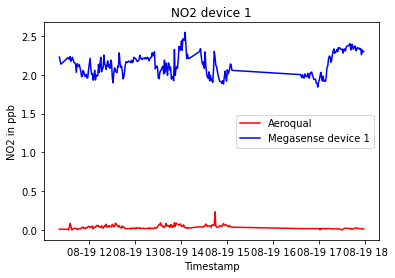

In [39]:
import matplotlib.pyplot as plt

x = D1['Date Time']
y1 = D1[' NO2(ppm)']
y2 = D1['data.no2_ppb']/1000

plt.plot(x, y1,'-r')
plt.plot(x, y2, '-b')
plt.xlabel('Timestamp')
plt.ylabel('NO2 in ppb')
plt.title('NO2 device 1')
plt.legend(['Aeroqual', 'Megasense device 1'])
plt.show()

18